In [53]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.constants as const
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plt.rcParams['legend.facecolor'] = 'white'

In [46]:
p21_p28_air = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/S21_S11_GapSweep_0.21to0.28.csv', skiprows=4)
p29_p4_air = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_S21S11_GapSweep0.29to0.4.csv', skiprows=4)
p25_p29_LN2 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_S21S11_GapSweep_0.25to0.29mm_3.1675GHz_LN2.csv', skiprows=4)

p25_LN2_tandel0 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/real_0.25mm_LN2_3.1675.csv', skiprows=4)

p23p29_LN2_tandel0 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_0.23to0.29_GapSweep_LN2_step1e-5_tanDelta0_3.1677GHz.csv', skiprows=4)

p1p19_LN2 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_0.1to0.19mm_GapSweep_LN2_tanDelta0_3.3875GHz.csv', skiprows=4)

In [54]:
p23p29_LN2_tandel0

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.00023,3.16665,-25.963782,-0.259070
1,0.00023,3.16670,-26.381649,-0.265902
2,0.00023,3.16675,-26.863068,-0.273956
3,0.00023,3.16680,-27.420968,-0.283514
4,0.00023,3.16685,-28.071625,-0.294956
...,...,...,...,...
282,0.00029,3.16845,-51.146537,-0.179165
283,0.00029,3.16850,-53.237421,-0.171625
284,0.00029,3.16855,-47.391313,-0.165438
285,0.00029,3.16860,-43.648965,-0.160316


In [48]:
p1p19_LN2[p1p19_LN2['% x_strip (m)']==0.00010]

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.0001,3.38725,-17.288002,-0.280750
1,0.0001,3.38735,-17.513805,-0.282981
2,0.0001,3.38745,-17.785662,-0.286087
3,0.0001,3.38755,-18.118883,-0.290476
4,0.0001,3.38765,-18.536536,-0.296787
5,0.0001,3.38775,-19.074563,-0.306071
6,0.0001,3.38785,-19.791810,-0.320148
7,0.0001,3.38795,-20.789904,-0.342347
8,0.0001,3.38805,-22.245941,-0.379203
9,0.0001,3.38815,-24.385597,-0.444825


In [52]:
p1p19_LN2[p1p19_LN2['% x_strip (m)']==0.00019]

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
279,0.00019,3.38725,-17.183903,-0.287102
280,0.00019,3.38735,-17.384721,-0.289118
281,0.00019,3.38745,-17.624756,-0.291894
282,0.00019,3.38755,-17.916210,-0.295753
283,0.00019,3.38765,-18.277480,-0.301215
284,0.00019,3.38775,-18.736279,-0.309101
285,0.00019,3.38785,-19.337127,-0.320820
286,0.00019,3.38795,-20.154562,-0.338883
287,0.00019,3.38805,-21.319342,-0.368026
288,0.00019,3.38815,-23.047355,-0.418090


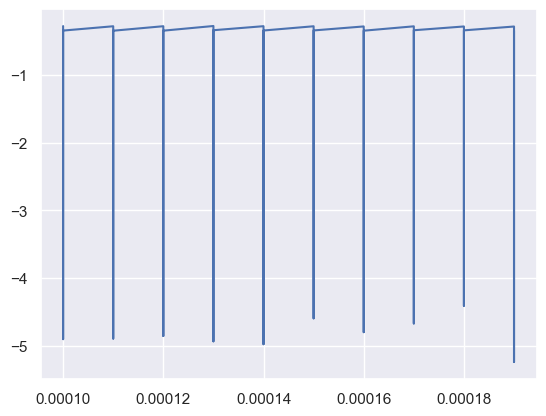

In [49]:
plt.plot(p1p19_LN2['% x_strip (m)'], p1p19_LN2['S21 (1)'])

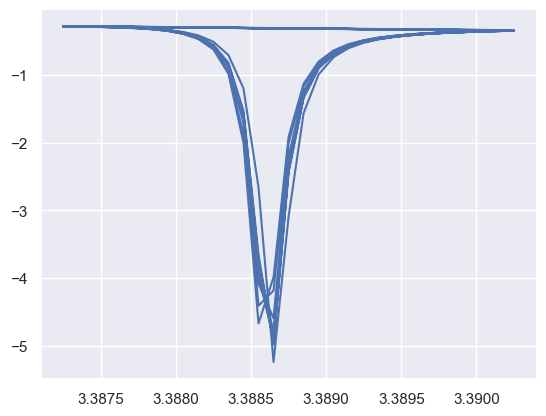

In [50]:
plt.plot(p1p19_LN2['freq (GHz)'], p1p19_LN2['S21 (1)'])

In [41]:
p25_p28_air = p21_p28_air[p21_p28_air['% x_strip (m)'] > 0.00024]
p29_air = p29_p4_air[p29_p4_air['% x_strip (m)']==0.00029]
p25_p29_air = pd.concat([p25_p28_air, p29_air])
p25p29_LN2_tandel0 = p23p29_LN2_tandel0[p23p29_LN2_tandel0['% x_strip (m)'] > 0.00024]
p25p29_LN2_tandel0

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
82,0.00025,3.16665,-25.366462,-0.430959
83,0.00025,3.16670,-25.764930,-0.437731
84,0.00025,3.16675,-26.226676,-0.445679
85,0.00025,3.16680,-26.767493,-0.455084
86,0.00025,3.16685,-27.408763,-0.466313
...,...,...,...,...
282,0.00029,3.16845,-51.146537,-0.179165
283,0.00029,3.16850,-53.237421,-0.171625
284,0.00029,3.16855,-47.391313,-0.165438
285,0.00029,3.16860,-43.648965,-0.160316


In [42]:
def separate_p1_2(df):
    df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # to normalize float precision
    unique_vals = sorted(df['% x_strip (m)'].unique())
    
    chunks = []
    for val in unique_vals:
        subset = df[df['% x_strip (m)'] == val]
        chunks.append(subset)
    
    return chunks

In [43]:
p2329_LN2 = separate_p1_2(p25p29_LN2_tandel0)
# len(p2329_LN2)

/var/folders/ky/hnfmqvvd74x03rjxm1q6hf580000gn/T/ipykernel_26501/905416050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # to normalize float precision


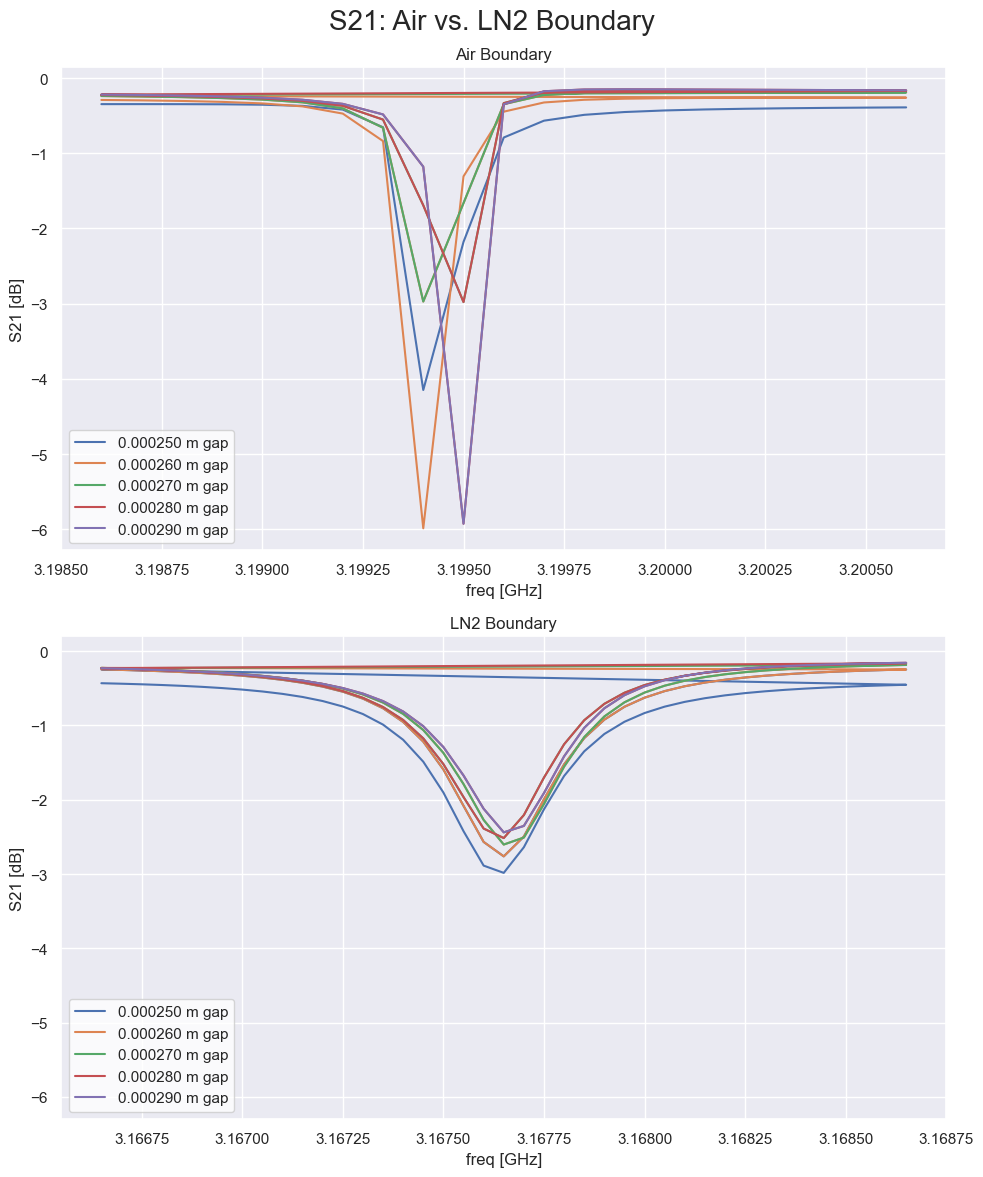

In [44]:
fig, ax = plt.subplots(2, 1, figsize = (10,12))

for i in np.arange(0.00025, 0.0003, 0.00001): 
    gap_sep_air = p25_p29_air[(p25_p29_air['% x_strip (m)'] > i - 0.00001) & (p25_p29_air['% x_strip (m)'] < i + 0.00001)]
    ax[0].plot(gap_sep_air['freq (GHz)'], gap_sep_air['S21 (1)'], label=f"{i:.6f} m gap")
    
    gap_sep_LN2 = p25p29_LN2_tandel0[(p25p29_LN2_tandel0['% x_strip (m)'] > i - 0.00001) & (p25p29_LN2_tandel0['% x_strip (m)'] < i + 0.00001)]
    ax[1].plot(gap_sep_LN2['freq (GHz)'], gap_sep_LN2['S21 (1)'], label=f"{i:.6f} m gap")

ax[0].legend()
ax[0].set_title('Air Boundary')
ax[1].legend()
ax[1].set_title('LN2 Boundary')
ax[1].set_ylim(-6.3, 0.2)
plt.setp(ax, xlabel = 'freq [GHz]', ylabel = 'S21 [dB]')
plt.suptitle('S21: Air vs. LN2 Boundary', fontsize = 20)
plt.tight_layout()

TypeError: list indices must be integers or slices, not str

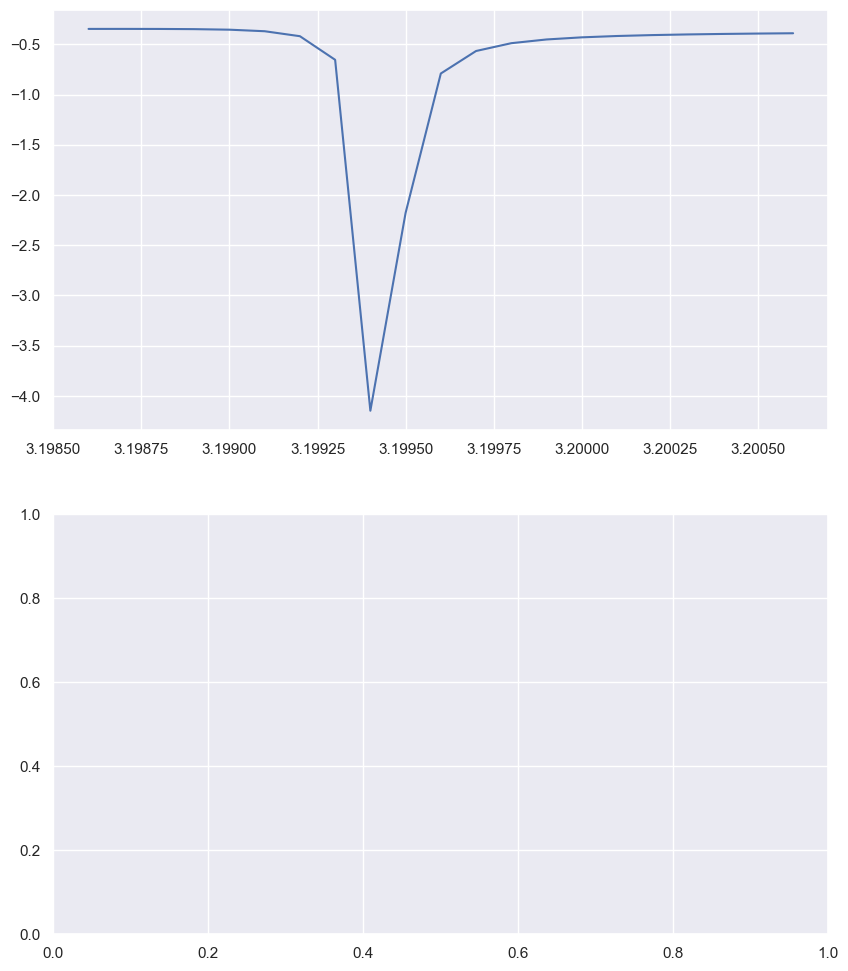

In [45]:
# fig, ax = plt.subplots(figsize = (10,8))
# for i in range(len(p2329_LN2)): 
#     ax.plot(p2329_LN2[i]['freq (GHz)'], p2329_LN2[i]['S21 (1)'], label=f"{p2329_LN2[i]['% x_strip (m)'].iloc[0]:.5f} m gap")

# ax.grid(True)
# ax.set_xlabel('freq [GHz]')
# ax.set_ylabel(r'$S_{21}$')
# ax.legend(facecolor='white')
# ax.set_title(r'$S_{21}$, $f_{center} = 3.1676$ GHz LN2', fontsize = 18)

fig, ax = plt.subplots(2, 1, figsize = (10,12))
for i in np.arange(0.00025, 0.0003, 0.00001): 
    gap_sep_air = p25_p29_air[(p25_p29_air['% x_strip (m)']>i-0.00001) & (p25_p29_air['% x_strip (m)']<i+0.00001)]
    ax[0].plot(gap_sep_air['freq (GHz)'], gap_sep_air['S21 (1)'], label= f"{i:.6f} m gap")
    gap_sep_LN2 = p2329_LN2[p2329_LN2['% x_strip (m)']>i-0.00001 & p2329_LN2['% x_strip (m)']<i+0.00001]
    ax[1].plot(p2329_LN2['freq (GHz)'], p2329_LN2['S21 (1)'], label= f"{i:.6f} m gap")
    
ax[0].legend()
ax[0].set_title('Air Boundary')
ax[1].legend()
ax[1].set_title('LN2 Boundary')
ax[1].set_ylim(-6.3, 0.2)
plt.setp(ax, xlabel = 'freq [GHz]', ylabel = 'S21 [dB]')
plt.suptitle('S21: Air vs. LN2 Boundary', fontsize = 20)
plt.tight_layout()

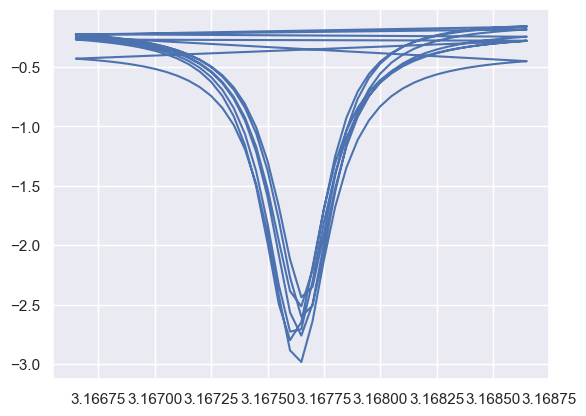

In [7]:
plt.plot(p23p29_LN2_tandel0['freq (GHz)'], p23p29_LN2_tandel0['S21 (1)'])

In [8]:
p25_LN2_tandel0

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.00025,3.1666,-25.019196,-0.425152
1,0.00025,3.1667,-25.764953,-0.437731
2,0.00025,3.1668,-26.767510,-0.455085
3,0.00025,3.1669,-28.179212,-0.479849
4,0.00025,3.1670,-30.266078,-0.516691
5,0.00025,3.1671,-33.181902,-0.574412
6,0.00025,3.1672,-33.393378,-0.670933
7,0.00025,3.1673,-27.554459,-0.845883
8,0.00025,3.1674,-21.603567,-1.192466
9,0.00025,3.1675,-16.484224,-1.902202


In [9]:
LN2_g25 = p25_p29_LN2[p25_p29_LN2['% x_strip (m)']==0.00025]
LN2_range = LN2_g25.loc[6:26]
LN2_range_array = np.array(LN2_range['freq (GHz)'])
LN2_chopped = p25_p29_LN2[p25_p29_LN2['freq (GHz)'].isin(LN2_range['freq (GHz)'])]
LN2_chop_p25 = LN2_chopped[LN2_chopped['% x_strip (m)']==0.00025]
LN2_chop_p25

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
6,0.00025,3.1666,-25.865194,-0.403428
7,0.00025,3.1667,-26.684722,-0.416470
8,0.00025,3.1668,-27.784768,-0.434505
9,0.00025,3.1669,-29.313748,-0.460319
10,0.00025,3.1670,-31.433637,-0.498878
11,0.00025,3.1671,-33.433161,-0.559606
12,0.00025,3.1672,-31.223855,-0.661850
13,0.00025,3.1673,-25.764145,-0.848753
14,0.00025,3.1674,-20.441767,-1.221987
15,0.00025,3.1675,-15.704140,-1.980439


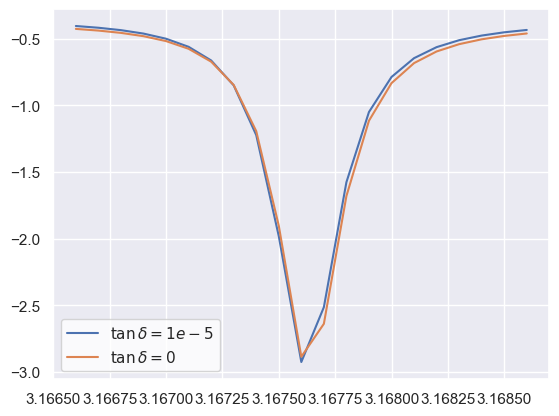

In [10]:
plt.plot(LN2_chop_p25['freq (GHz)'], LN2_chop_p25['S21 (1)'], label = r'$\tan{\delta}=1e-5$')
plt.plot(p25_LN2_tandel0['freq (GHz)'], p25_LN2_tandel0['S21 (1)'], label = r'$\tan{\delta}=0$')
plt.legend()

In [11]:
p25_LN2_prev = p25_p29_LN2[p25_p29_LN2['% x_strip (m)']<0.00026-0.000001]
p25_LN2_prev

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.00025,3.1660,-23.469248,-0.369431
1,0.00025,3.1661,-23.709272,-0.372394
2,0.00025,3.1662,-23.991286,-0.376042
3,0.00025,3.1663,-24.327009,-0.380586
4,0.00025,3.1664,-24.733061,-0.386334
5,0.00025,3.1665,-25.233643,-0.393726
6,0.00025,3.1666,-25.865194,-0.403428
7,0.00025,3.1667,-26.684722,-0.416470
8,0.00025,3.1668,-27.784768,-0.434505
9,0.00025,3.1669,-29.313748,-0.460319


## April 22-23

In [17]:
p29_air

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.00029,3.1986,-18.497260,-0.219798
1,0.00029,3.1987,-18.237237,-0.225591
2,0.00029,3.1988,-17.912579,-0.233407
3,0.00029,3.1989,-17.495870,-0.244466
4,0.00029,3.1990,-16.941201,-0.261229
5,0.00029,3.1991,-16.165098,-0.289233
6,0.00029,3.1992,-14.998635,-0.343816
7,0.00029,3.1993,-13.033383,-0.484281
8,0.00029,3.1994,-8.974521,-1.179021
9,0.00029,3.1995,-4.332532,-5.923702


In [18]:
p25_p29_air = pd.concat([p25_p28_air, p29_air])

In [19]:
print(len(p25_p29_air))
print(len(p25_p28_air) + len(p29_air))

105
105


In [20]:
p25_p29_LN2

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.00025,3.1660,-23.469248,-0.369431
1,0.00025,3.1661,-23.709272,-0.372394
2,0.00025,3.1662,-23.991286,-0.376042
3,0.00025,3.1663,-24.327009,-0.380586
4,0.00025,3.1664,-24.733061,-0.386334
...,...,...,...,...
175,0.00029,3.1691,-32.832595,-0.137725
176,0.00029,3.1692,-32.153624,-0.135969
177,0.00029,3.1693,-31.599493,-0.134614
178,0.00029,3.1694,-31.138056,-0.133562


In [21]:
p25_p29_LN2[p25_p29_LN2['S21 (1)'] == min(p25_p29_LN2['S21 (1)'])]

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
16,0.00025,3.1676,-12.267584,-2.925169


In [22]:
len(p25_p29_LN2)

180

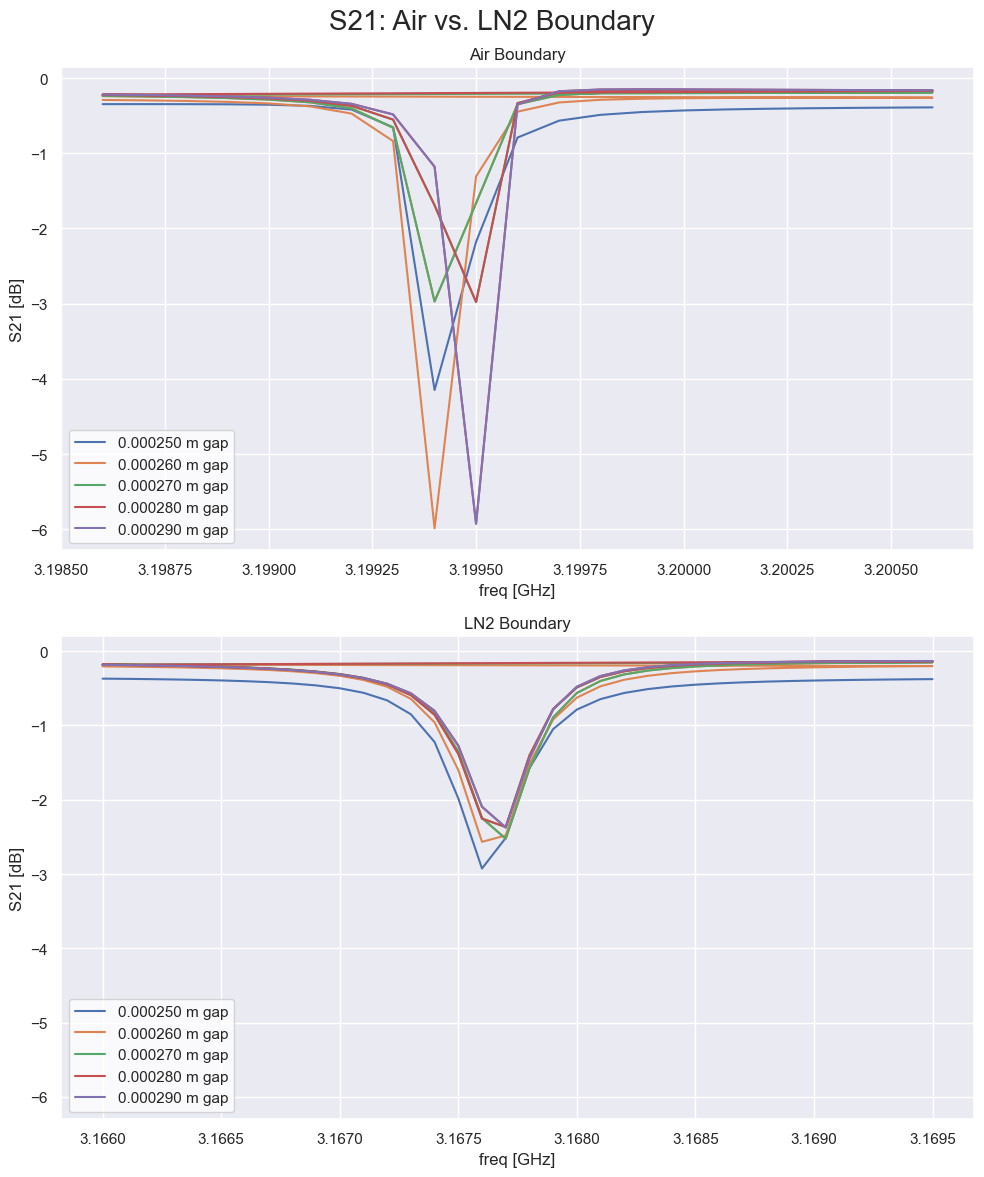

In [23]:
fig, ax = plt.subplots(2, 1, figsize = (10,12))
for i in np.arange(0.00025, 0.0003, 0.00001): 
    gap_sep_air = p25_p29_air[(p25_p29_air['% x_strip (m)']>i-0.00001) & (p25_p29_air['% x_strip (m)']<i+0.00001)]
    ax[0].plot(gap_sep_air['freq (GHz)'], gap_sep_air['S21 (1)'], label= f"{i:.6f} m gap")
    gap_sep_LN2 = p25_p29_LN2[(p25_p29_LN2['% x_strip (m)']>i-0.00001) & (p25_p29_LN2['% x_strip (m)']<i+0.00001)]
    ax[1].plot(gap_sep_LN2['freq (GHz)'], gap_sep_LN2['S21 (1)'], label= f"{i:.6f} m gap")
    
ax[0].legend()
ax[0].set_title('Air Boundary')
ax[1].legend()
ax[1].set_title('LN2 Boundary')
ax[1].set_ylim(-6.3, 0.2)
plt.setp(ax, xlabel = 'freq [GHz]', ylabel = 'S21 [dB]')
plt.suptitle('S21: Air vs. LN2 Boundary', fontsize = 20)
plt.tight_layout()


In [110]:
print(min(p25_p29_air['freq (GHz)']), max(p25_p29_air['freq (GHz)']))
print('diff = ' + str(max(p25_p29_air['freq (GHz)']) - min(p25_p29_air['freq (GHz)'])))
print(min(p25_p29_LN2['freq (GHz)']), max(p25_p29_LN2['freq (GHz)']))
print('diff = ' + str(max(p25_p29_LN2['freq (GHz)']) - min(p25_p29_LN2['freq (GHz)'])))

3.1986000000000003 3.2005999999999997
diff = 0.0019999999999993356
3.1660000000000004 3.1695
diff = 0.0034999999999998366


In [111]:
len(p25_p29_LN2[p25_p29_LN2['% x_strip (m)']==0.00025])

36

In [112]:
len(p25_p29_air[p25_p29_air['% x_strip (m)']==0.00025])

21

In [113]:
LN2_g25 = p25_p29_LN2[p25_p29_LN2['% x_strip (m)']==0.00025]
LN2_g25

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.00025,3.1660,-23.469248,-0.369431
1,0.00025,3.1661,-23.709272,-0.372394
2,0.00025,3.1662,-23.991286,-0.376042
3,0.00025,3.1663,-24.327009,-0.380586
4,0.00025,3.1664,-24.733061,-0.386334
5,0.00025,3.1665,-25.233643,-0.393726
6,0.00025,3.1666,-25.865194,-0.403428
7,0.00025,3.1667,-26.684722,-0.416470
8,0.00025,3.1668,-27.784768,-0.434505
9,0.00025,3.1669,-29.313748,-0.460319


In [114]:
LN2_range = LN2_g25.loc[7:27]
LN2_range

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
7,0.00025,3.1667,-26.684722,-0.416470
8,0.00025,3.1668,-27.784768,-0.434505
9,0.00025,3.1669,-29.313748,-0.460319
10,0.00025,3.1670,-31.433637,-0.498878
11,0.00025,3.1671,-33.433161,-0.559606
12,0.00025,3.1672,-31.223855,-0.661850
13,0.00025,3.1673,-25.764145,-0.848753
14,0.00025,3.1674,-20.441767,-1.221987
15,0.00025,3.1675,-15.704140,-1.980439
16,0.00025,3.1676,-12.267584,-2.925169


In [115]:
LN2_range_array = np.array(LN2_range['freq (GHz)'])

In [117]:
LN2_chopped = p25_p29_LN2[p25_p29_LN2['freq (GHz)'].isin(LN2_range['freq (GHz)'])]
LN2_chopped

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
7,0.00025,3.1667,-26.684722,-0.416470
8,0.00025,3.1668,-27.784768,-0.434505
9,0.00025,3.1669,-29.313748,-0.460319
10,0.00025,3.1670,-31.433637,-0.498878
11,0.00025,3.1671,-33.433161,-0.559606
...,...,...,...,...
167,0.00029,3.1683,-37.496588,-0.215498
168,0.00029,3.1684,-46.114974,-0.189129
169,0.00029,3.1685,-50.712815,-0.172151
170,0.00029,3.1686,-42.323737,-0.160755


In [134]:
air_p27p28 = p25_p29_air[(p25_p29_air['% x_strip (m)'] > 0.00027-0.000005) & (p25_p29_air['% x_strip (m)'] < 0.00029)]

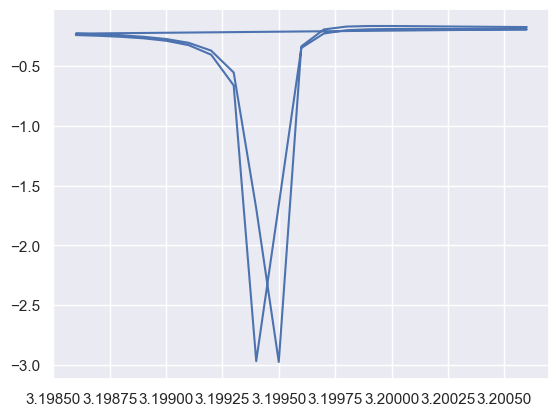

In [135]:
plt.plot(air_p27p28['freq (GHz)'], air_p27p28['S21 (1)'])

In [129]:
LN2_chopped[(LN2_chopped['% x_strip (m)'] > 0.00027-0.00005) & (LN2_chopped['% x_strip (m)'] < 0.00029)]

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
7,0.00025,3.1667,-26.684722,-0.416470
8,0.00025,3.1668,-27.784768,-0.434505
9,0.00025,3.1669,-29.313748,-0.460319
10,0.00025,3.1670,-31.433637,-0.498878
11,0.00025,3.1671,-33.433161,-0.559606
...,...,...,...,...
131,0.00028,3.1683,-29.112848,-0.226484
132,0.00028,3.1684,-31.486466,-0.198842
133,0.00028,3.1685,-33.898884,-0.180707
134,0.00028,3.1686,-36.433020,-0.168317


In [121]:
air_freqs = np.array(p25_p29_air['freq (GHz)'])
LN2chop_freqs = np.array(LN2_chopped['freq (GHz)'])

# ax[0].set_xticks(np.arange(np.max(air_freqs), np.max(air_freqs), 0.0001))
# ax[1].set_xticks(np.arange(np.max(LN2chop_freqs), np.max(LN2chop_freqs), 0.0001))



In [122]:
# for gridlines 

# # Set x and y ticks manually (e.g., every 1 unit on x, 0.5 on y)
# plt.xticks(np.arange(np.min(f), 11, 1))
# plt.yticks(np.arange(-1, 1.1, 0.5))

np.max(air_freqs)
np.min(air_freqs)

3.1986000000000003

In [ ]:
plt.plot(p25_p29_air['freq (GHz)'])

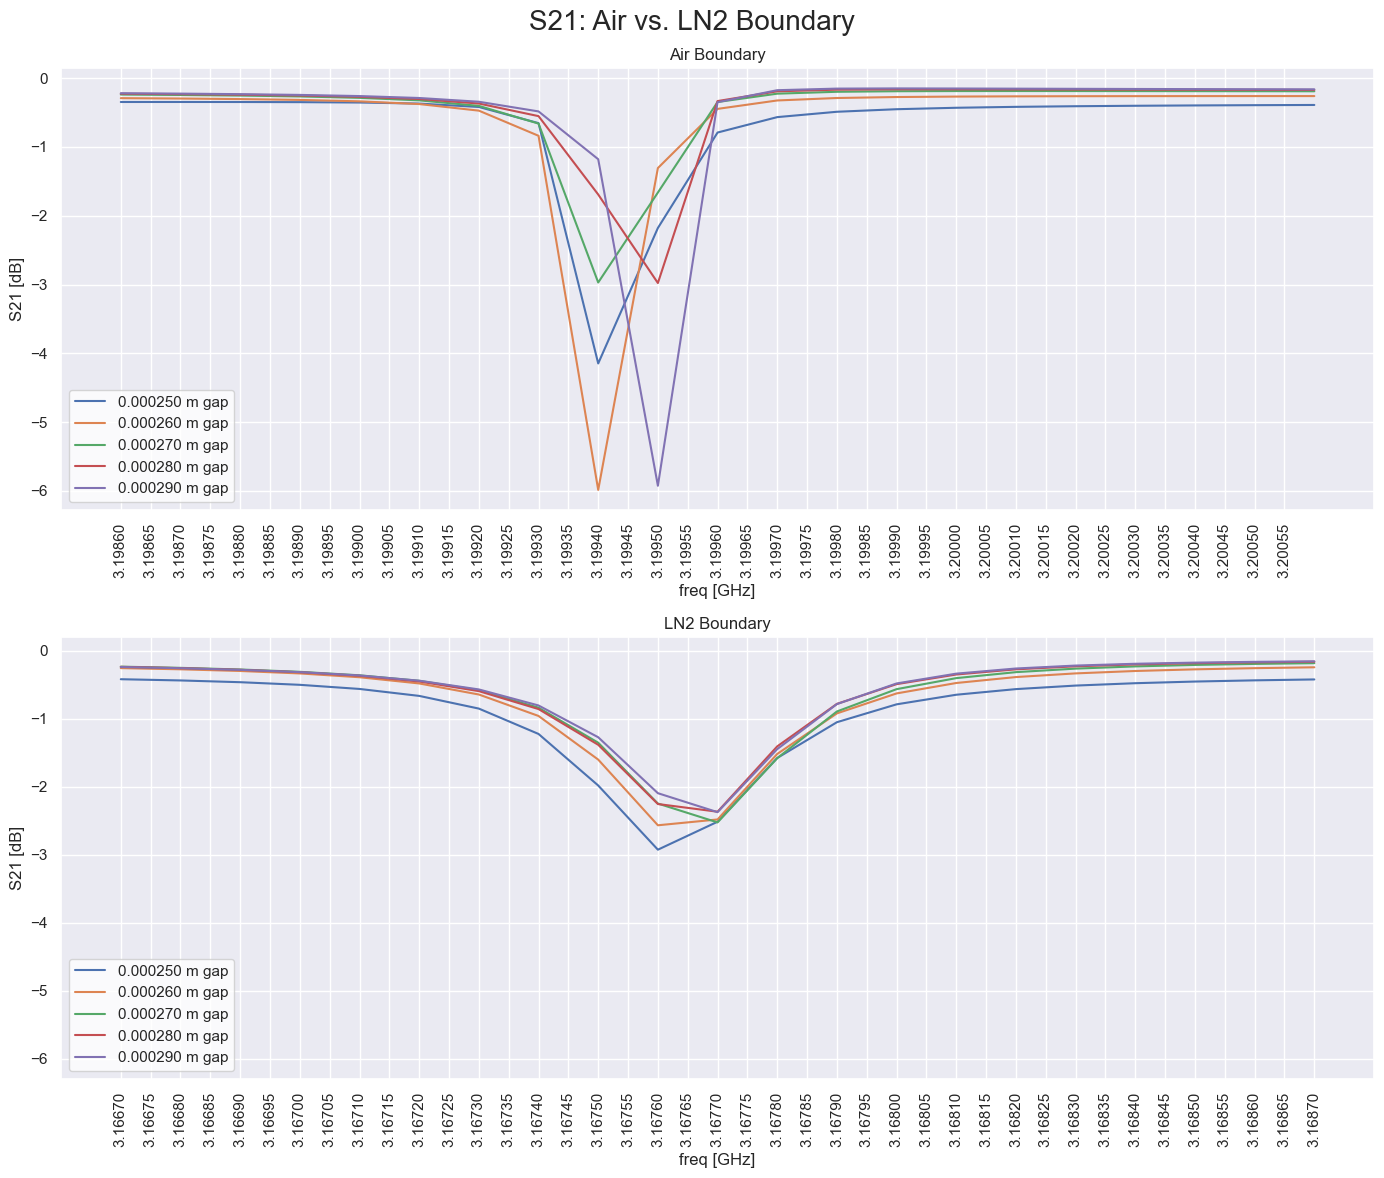

In [126]:
fig, ax = plt.subplots(2, 1, figsize = (14,12))
for i in np.arange(0.00025, 0.0003, 0.00001): 
    gap_sep_air = p25_p29_air[(p25_p29_air['% x_strip (m)']>i-0.000005) & (p25_p29_air['% x_strip (m)']<i+0.000005)]
    ax[0].plot(gap_sep_air['freq (GHz)'], gap_sep_air['S21 (1)'], label= f"{i:.6f} m gap")
    gap_sep_LN2 = LN2_chopped[(LN2_chopped['% x_strip (m)']>i-0.000005) & (LN2_chopped['% x_strip (m)']<i+0.000005)]
    ax[1].plot(gap_sep_LN2['freq (GHz)'], gap_sep_LN2['S21 (1)'], label= f"{i:.6f} m gap")

ax[0].set_xticks(np.arange(np.min(air_freqs), np.max(air_freqs), 0.00005))
ax[0].legend()
ax[0].set_title('Air Boundary')
ax[0].grid(True)

ax[1].set_xticks(np.arange(np.min(LN2chop_freqs), np.max(LN2chop_freqs), 0.00005))
ax[1].legend()
ax[1].set_title('LN2 Boundary')
ax[1].set_ylim(-6.3, 0.2)
ax[1].grid(True)

plt.setp(ax, xlabel = 'freq [GHz]', ylabel = 'S21 [dB]')
plt.suptitle('S21: Air vs. LN2 Boundary', fontsize = 20)
plt.setp(ax[0].get_xticklabels(), rotation=90)
plt.setp(ax[1].get_xticklabels(), rotation=90)
plt.tight_layout()



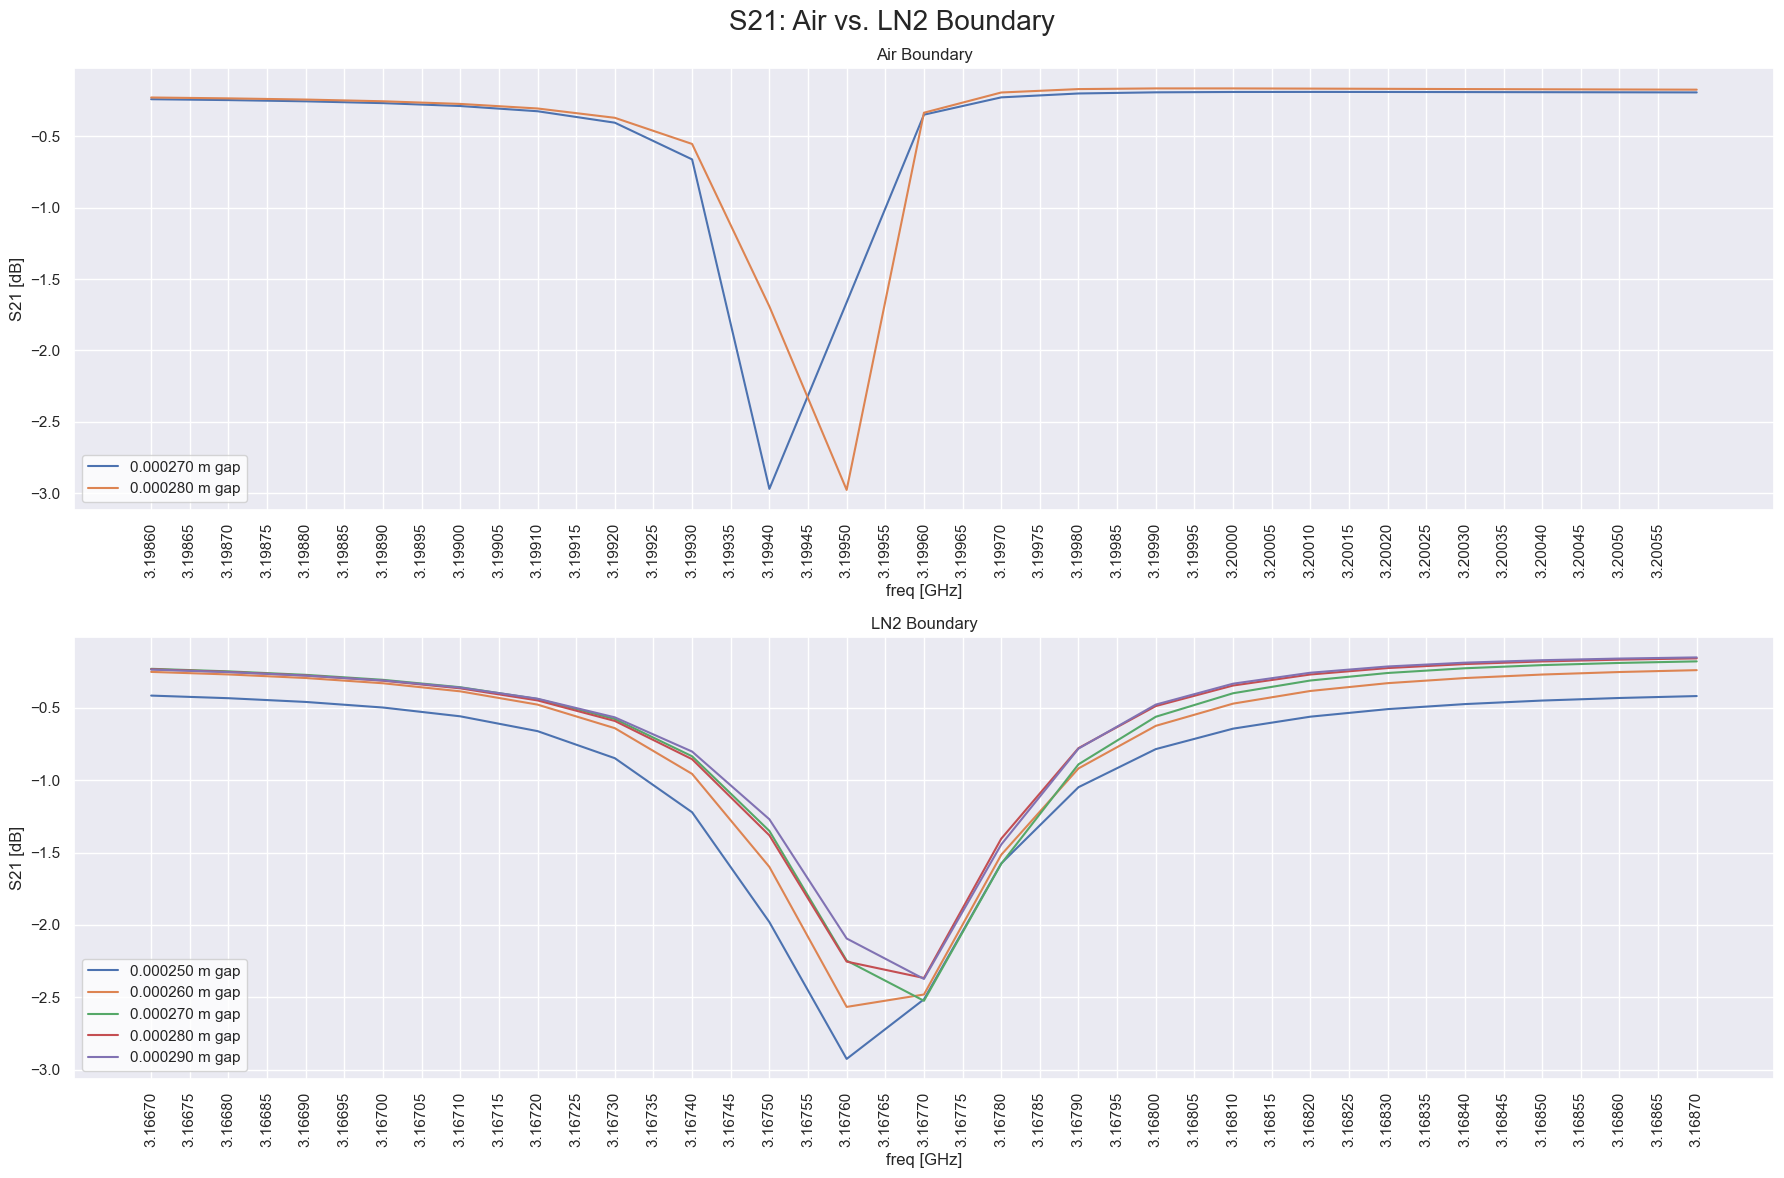

In [139]:
fig, ax = plt.subplots(2, 1, figsize = (18,12))

for i in np.arange(0.00027, 0.00029, 0.00001): 
    gap_sep_air = p25_p29_air[(p25_p29_air['% x_strip (m)']>i-0.000005) & (p25_p29_air['% x_strip (m)']<i+0.000005)]
    ax[0].plot(gap_sep_air['freq (GHz)'], gap_sep_air['S21 (1)'], label= f"{i:.6f} m gap")
for i in np.arange(0.00025, 0.0003, 0.00001): 
    gap_sep_LN2 = LN2_chopped[(LN2_chopped['% x_strip (m)']>i-0.000005) & (LN2_chopped['% x_strip (m)']<i+0.000005)]
    ax[1].plot(gap_sep_LN2['freq (GHz)'], gap_sep_LN2['S21 (1)'], label= f"{i:.6f} m gap")

ax[0].set_xticks(np.arange(np.min(air_freqs), np.max(air_freqs), 0.00005))
ax[0].legend()
ax[0].set_title('Air Boundary')
ax[0].grid(True)

ax[1].set_xticks(np.arange(np.min(LN2chop_freqs), np.max(LN2chop_freqs), 0.00005))
ax[1].legend()
ax[1].set_title('LN2 Boundary')
#ax[1].set_ylim(-6.3, 0.2)
ax[1].grid(True)

plt.setp(ax, xlabel = 'freq [GHz]', ylabel = 'S21 [dB]')
plt.suptitle('S21: Air vs. LN2 Boundary', fontsize = 20)
plt.setp(ax[0].get_xticklabels(), rotation=90)
plt.setp(ax[1].get_xticklabels(), rotation=90)
plt.tight_layout()

In [ ]:
LN2_freqchop = p25_p29_LN2.loc[7:29]


In [50]:
36-21

15

In [42]:
air_freqs = np.array(p25_p29_air['freq (GHz)'])
LN2_freqs = np.array(p25_p29_LN2['freq (GHz)'])

In [83]:
air_freqs[0:21]
LN2_freqs[0:37]

array([3.166 , 3.1661, 3.1662, 3.1663, 3.1664, 3.1665, 3.1666, 3.1667,
       3.1668, 3.1669, 3.167 , 3.1671, 3.1672, 3.1673, 3.1674, 3.1675,
       3.1676, 3.1677, 3.1678, 3.1679, 3.168 , 3.1681, 3.1682, 3.1683,
       3.1684, 3.1685, 3.1686, 3.1687, 3.1688, 3.1689, 3.169 , 3.1691,
       3.1692, 3.1693, 3.1694, 3.1695, 3.166 ])

In [ ]:
# Set x and y ticks manually (e.g., every 1 unit on x, 0.5 on y)
ax[0].xticks(np.arange(np.min(air_freqs), 0.00001, np.max(air_freqs)))
ax[1].xticks(np.arange(np.min()))
plt.yticks(np.arange(-1, 1.1, 0.5))

In [46]:
len(air_freqs)

105

In [44]:
LN2_freqs

array([3.166 , 3.1661, 3.1662, 3.1663, 3.1664, 3.1665, 3.1666, 3.1667,
       3.1668, 3.1669, 3.167 , 3.1671, 3.1672, 3.1673, 3.1674, 3.1675,
       3.1676, 3.1677, 3.1678, 3.1679, 3.168 , 3.1681, 3.1682, 3.1683,
       3.1684, 3.1685, 3.1686, 3.1687, 3.1688, 3.1689, 3.169 , 3.1691,
       3.1692, 3.1693, 3.1694, 3.1695, 3.166 , 3.1661, 3.1662, 3.1663,
       3.1664, 3.1665, 3.1666, 3.1667, 3.1668, 3.1669, 3.167 , 3.1671,
       3.1672, 3.1673, 3.1674, 3.1675, 3.1676, 3.1677, 3.1678, 3.1679,
       3.168 , 3.1681, 3.1682, 3.1683, 3.1684, 3.1685, 3.1686, 3.1687,
       3.1688, 3.1689, 3.169 , 3.1691, 3.1692, 3.1693, 3.1694, 3.1695,
       3.166 , 3.1661, 3.1662, 3.1663, 3.1664, 3.1665, 3.1666, 3.1667,
       3.1668, 3.1669, 3.167 , 3.1671, 3.1672, 3.1673, 3.1674, 3.1675,
       3.1676, 3.1677, 3.1678, 3.1679, 3.168 , 3.1681, 3.1682, 3.1683,
       3.1684, 3.1685, 3.1686, 3.1687, 3.1688, 3.1689, 3.169 , 3.1691,
       3.1692, 3.1693, 3.1694, 3.1695, 3.166 , 3.1661, 3.1662, 3.1663,
      

In [47]:
LN2_freqs_chop = LN2_freqs[:105]

TypeError: list indices must be integers or slices, not str

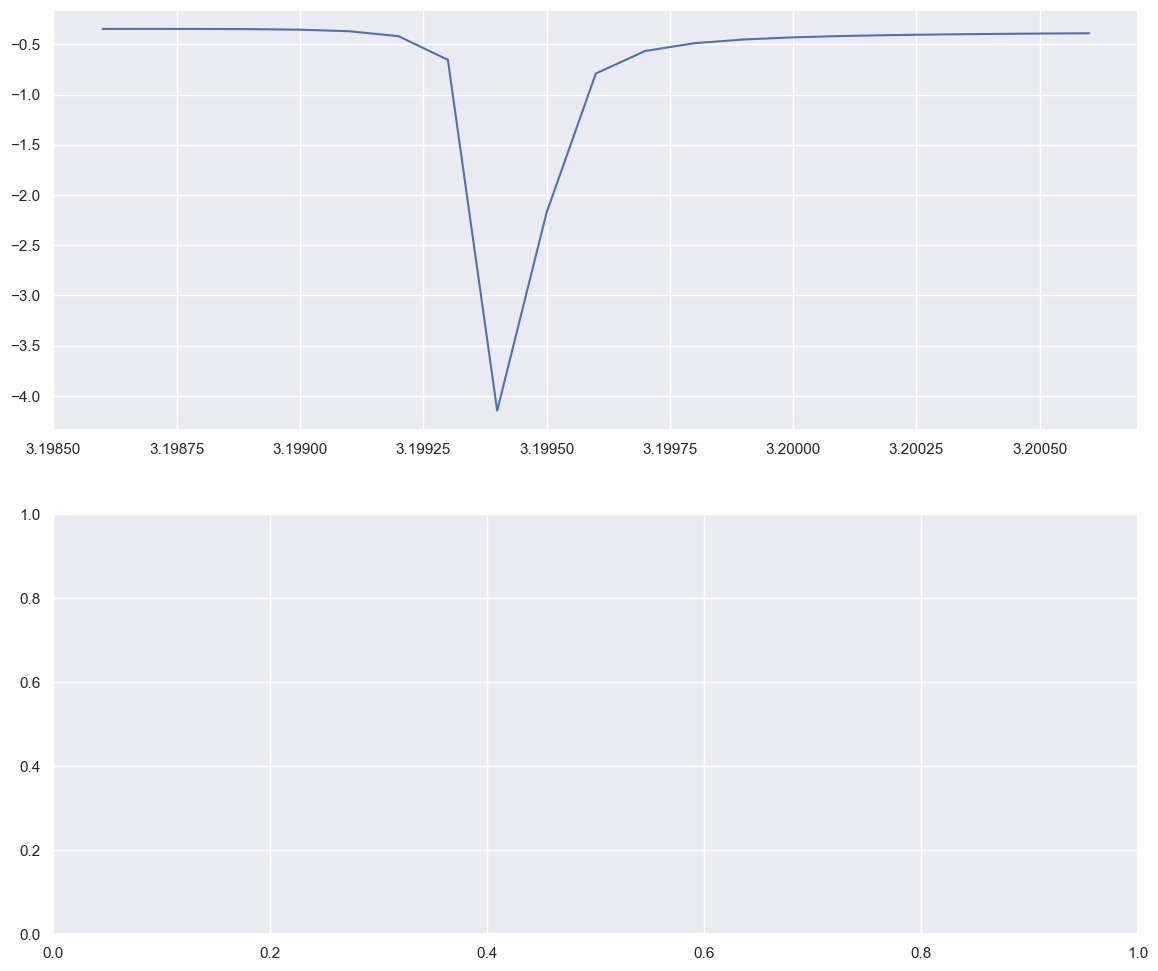

In [172]:
fig, ax = plt.subplots(2, 1, figsize = (14,12))
for i in np.arange(0.00025, 0.0003, 0.00001): 
    gap_sep_air = p25_p29_air[(p25_p29_air['% x_strip (m)']>i-0.000005) & (p25_p29_air['% x_strip (m)']<i+0.000005)]
    ax[0].plot(gap_sep_air['freq (GHz)'], gap_sep_air['S21 (1)'], label= f"{i:.6f} m gap")
    gap_sep_LN2 = p2329_LN2[(p2329_LN2['% x_strip (m)']>i-0.000005) & (p2329_LN2['% x_strip (m)']<i+0.000005)]
    ax[1].plot(p2329_LN2['freq (GHz)'], p2329_LN2['S21 (1)'], label= f"{i:.6f} m gap")

ax[0].set_xticks(np.arange(np.min(air_freqs), np.max(air_freqs), 0.00005))
ax[0].legend()
ax[0].set_title('Air Boundary')
ax[0].grid(True)

ax[1].set_xticks(np.arange(np.min(LN2chop_freqs), np.max(LN2chop_freqs), 0.00005))
ax[1].legend()
ax[1].set_title('LN2 Boundary')
ax[1].set_ylim(-6.3, 0.2)
ax[1].grid(True)

plt.setp(ax, xlabel = 'freq [GHz]', ylabel = 'S21 [dB]')
plt.suptitle('S21: Air vs. LN2 Boundary', fontsize = 20)
plt.setp(ax[0].get_xticklabels(), rotation=90)
plt.setp(ax[1].get_xticklabels(), rotation=90)
plt.tight_layout()